In [415]:
# Data Exploration and Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

df = pd.read_csv('canada_rent.csv')


In [416]:
df.sample(10)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
16558,562212,Carleton Place,Ontario,320 Lake Avenue East,45.142932,-76.132218,Long Term,Apartment,2200.0,2 Beds,1,1150,/on/carleton-place/rentals/apartment/1-bedroom...,Unfurnished,Immediate,NaN,True,True
4182,389839,Calgary,Alberta,738 1 Avenue Southwest,51.052561,-114.076908,Long Term,Condo Unit,4600.0,2 Beds,2,1182,/ab/calgary/rentals/condo/2-bedrooms/downtown/...,Unfurnished,August 01,Non-Smoking,True,True
5300,517036,Edmonton,Alberta,10110 120 STREET NW,53.541289,-113.529248,Long Term,Apartment,1830.0,1 Bed,1,589,/ab/edmonton/rentals/apartment/1-bedroom/olive...,Unfurnished,Immediate,Non-Smoking,True,True
3804,527379,Calgary,Alberta,46 9 Street NE,51.050413,-114.039997,Long Term,Condo Unit,2200.0,1 Bed,1,650,/ab/calgary/rentals/condo/1-bedroom/bridgeland...,Unfurnished,July 01,Non-Smoking,True,True
21209,533577,Toronto,Ontario,263 Russell Hill Road,43.685110,-79.407130,Long Term,Apartment,2300.0,1 Bed,1,534,/on/toronto/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,NaN,True,True
14063,359534,Calgary,Alberta,515 4 Ave NE,51.055763,-114.051664,Long Term,Apartment,0.0,2 Beds,2,NaN,/ab/calgary/rentals/apartment/2-bedrooms/bridg...,Unfurnished,No Vacancy,Smoke Free Building,True,True
2899,572252,Calgary,Alberta,1521 14 Avenue Southwest,51.040234,-114.096172,Negotiable,Main Floor,1900.0,1 Bed,1,569,/ab/calgary/rentals/main-floor/1-bedroom/sunal...,Furnished,July 01,Non-Smoking,True,False
10628,537655,Calgary,Alberta,West Springs,51.062867,-114.190232,Negotiable,Room For Rent,900.0,1 Bed,1,2300,/ab/calgary/rentals/shared/1-bedroom/west-spri...,Furnished,Immediate,Non-Smoking,False,False
10599,526811,Calgary,Alberta,6545 36 Avenue Northwest,51.085496,-114.184825,Long Term,Main Floor,2100.0,3 Beds,1,900,/ab/calgary/rentals/main-floor/3-bedrooms/bown...,Unfurnished,Immediate,Non-Smoking,False,False
15062,553231,Winnipeg,Manitoba,250 Centre Street,49.797738,-97.197545,Long Term,Apartment,1485.0,1 Bed,1,610,/mb/winnipeg/rentals/apartment/1-bedroom/bridg...,Unfurnished,September 01,Non-Smoking,True,True


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [418]:
df.isnull().sum()

,0
rentfaster_id,0
city,0
province,0
address,125
latitude,0
longitude,0
lease_term,46
type,0
price,0
beds,132


# Cleaning the Data to include only relevant and numerical data

In [419]:
# Data cleaning

# converting numeric columns to numerica data types so we can clean out the non-numeric rows
df['sq_feet'] = pd.to_numeric(df['sq_feet'],errors='coerce')
df['baths']= pd.to_numeric(df['baths'],errors='coerce')

df['beds'] = df['beds'].replace('Studio', '1 Beds')
df['beds'] = df['beds'].str.extract('(\d+)')
df['beds']= pd.to_numeric(df['beds'],errors='coerce')

# dropping rows with NaN values
df.dropna(inplace=True)

# selecting relevant columns to keep in dataframe
df=df[['city','province','latitude','longitude','lease_term','type','price','beds','baths','sq_feet','smoking','cats','dogs']]
df.isnull().sum()


df.sample(10)

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,smoking,cats,dogs
12917,Calgary,Alberta,51.055780,-114.178203,Negotiable,House,7000.00,7.0,5.0,4200.0,Non-Smoking,True,True
796,Calgary,Alberta,51.038823,-114.077125,Long Term,Condo Unit,1675.00,1.0,1.0,460.0,Non-Smoking,False,False
3855,Calgary,Alberta,51.129430,-113.946800,Long Term,Apartment,2000.00,2.0,2.0,822.0,Non-Smoking,False,False
3949,Calgary,Alberta,51.043139,-114.137401,Long Term,Condo Unit,2500.00,1.0,1.0,640.0,Non-Smoking,False,False
17678,Markham,Ontario,43.807117,-79.422361,Long Term,Apartment,2681.03,2.0,1.0,828.0,Non-Smoking,False,False
24452,Montréal,Quebec,45.516509,-73.627587,Long Term,Apartment,1670.00,1.0,1.0,600.0,Non-Smoking,False,False
11024,Calgary,Alberta,51.034910,-114.077435,Long Term,Apartment,2100.00,2.0,1.0,760.0,Non-Smoking,True,True
17305,LaSalle,Ontario,45.450923,-73.606349,Long Term,Apartment,2281.00,2.0,2.0,1046.0,Non-Smoking,True,True
19486,St. Catharines,Ontario,43.174199,-79.250141,Long Term,Apartment,1875.13,1.0,1.0,690.0,Non-Smoking,False,False
24631,Montréal,Quebec,45.509169,-73.579387,Long Term,Apartment,1400.00,1.0,1.0,370.0,Non-Smoking,False,False


In [420]:
# Feature Engineering

# converting object type columns to numerical outputs to facilitate ML
df['cats'] = df['cats'].map({True: 1, False: 0})
df['dogs'] = df['dogs'].map({True: 1, False: 0})
df['smoking'] = df['smoking'].map({'Non-Smoking': 0, 'Smoke Free Building': 0, 'Negotiable': 1, 'Smoking Allowed': 1})

# removing all non-numerical values from data
df_numerical = df[['latitude','longitude','price','beds','baths','sq_feet','cats','dogs']]

df.sample(10)

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,smoking,cats,dogs
12215,Calgary,Alberta,51.186116,-114.109821,Long Term,Apartment,2300.0,2.0,2.0,1020.0,0,1,1
8268,Grande Prairie,Alberta,55.147793,-118.778158,Long Term,Apartment,1395.0,2.0,1.0,0.0,0,0,0
15075,Winnipeg,Manitoba,49.797738,-97.197545,Long Term,Apartment,2165.0,3.0,2.0,1075.0,0,1,1
21965,Toronto,Ontario,43.639318,-79.409636,Long Term,Apartment,3280.0,2.0,2.0,711.0,0,1,1
24816,Pointe-Claire,Quebec,45.468491,-73.827541,Long Term,Apartment,2220.0,2.0,2.0,860.0,0,1,1
8204,Fort McMurray,Alberta,56.754366,-111.434958,Negotiable,Condo Unit,1875.0,2.0,1.0,775.0,0,0,0
13650,Calgary,Alberta,51.090672,-114.066669,Long Term,Duplex,1800.0,2.0,1.0,1000.0,0,0,0
7475,Edmonton,Alberta,53.396695,-113.525517,Long Term,House,2300.0,3.0,2.5,1430.0,0,1,1
1219,Calgary,Alberta,50.985064,-114.079767,Long Term,Main Floor,2495.0,3.0,1.0,1200.0,0,0,0
13967,Calgary,Alberta,51.041469,-114.060200,Negotiable,Condo Unit,1950.0,1.0,1.0,638.0,0,0,0


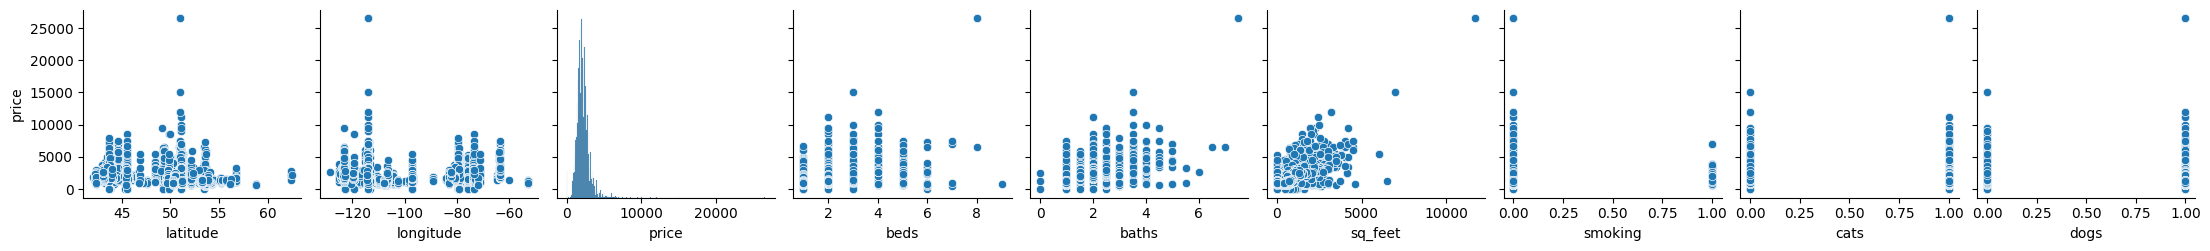

In [421]:
# searching for correlations to price
sns.pairplot(df,y_vars='price')

# We'll Try a Simple Linear Regression Model first

In [422]:
# Preparing Data for Simple Linear Regression Model Training

# Using square feet as our independant variable
X = df_numerical[['sq_feet']]
y = df_numerical['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [423]:
# Train Simple Linear Regression Model

slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

LinearRegression()

In [424]:
# Test Simple Linear Regression Model

y_pred = slr_model.predict(X_test)

In [425]:
# Check Simple Linear Regression Model Accuracy

# Obtain metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(499.3221528197302, 502840.7215512574, 709.1126296655965)

# Next We'll try a Multiple Linear Regression Model

In [426]:
# Preparing Data for Multiple Linear Regression Model Training

X = df_numerical.drop('price', axis=1)
y = df_numerical['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [427]:
# Train Multiple Linear Regression Model

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [428]:
# Test Multiple Linear Regression Model

y_pred = mlr_model.predict(X_test)

In [429]:
# Check Multiple Linear Regression Model Accuracy

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(414.13961407074277, 400814.07534970925, 633.09878798629)

# Polynomial Regression Model

In [430]:
# Preparing Data for Polynomial Regression Model Training

X = df_numerical.drop('price', axis=1)
y = df_numerical['price']

# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=5, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.15, random_state=1)

In [431]:
# Train Polynomial Model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [432]:
# Test Multiple Linear Regression Model

y_pred = poly_model.predict(X_test)

In [433]:
# Check Polynomial Regression Model Accuracy

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(370.52945847018697, 324406.3149542764, 569.5667783098628)

# Ridge Regression Model

Using GridSearchCV to find best alpha value

In [434]:
# Ridge

X = df_numerical.drop('price', axis=1)
y = df_numerical['price']

X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

el_model = Ridge()

param_grid = {'alpha':[7,8,9,10,11,12]}

grid_model = GridSearchCV(estimator=el_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [7, 8, 9, 10, 11, 12]},
             scoring='neg_mean_squared_error', verbose=1)

In [435]:
grid_model.best_estimator_


Ridge(alpha=9)

In [436]:
final_y = grid_model.predict(scaled_X_test)

# Obtain metrics
MAE = mean_absolute_error(y_test, final_y)
MSE = mean_squared_error(y_test, final_y)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(388.6321669825367, 355581.1429295888, 596.3062492793354)

# Bad Results
**None of the models used yield satisfactory results and all of theses have proven inaccurate.**

* Simple Linear Regression Model Score:
(MAE: 499.3221528197302, MSE: 502840.7215512574, RMSE: 709.1126296655965)

* Multiple Lineat Regression Model Score:
(MAE: 414.13961407074277, MSE: 400814.07534970925, RMSE: 633.09878798629)

* Polynomial Regression Model Score:
(MAE: 370.52945847018697, MSE: 324406.3149542764, RMSE: 569.5667783098628)

* Ridge Regression Model Score:
(MAE: 388.6321669825367, MSE: 355581.1429295888, RMSE: 596.3062492793354)
